# WINE QUALITY: WHITE

**Davinson Mosquera González**                                                            
Ingeniero Administrador    
davmosqueragon@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

---

El conjunto de datos utilizados para el presente análisis, pueden ser descargados de forma gratuita en [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) 

Puede descargar directamente en la siguiente dirección (https://archive.ics.uci.edu/ml/datasets/Wine+Quality) 


# Definición del problema

Se tiene que el vinho verde, es una variedad de vino de Portugal, de una región caracterizada por pequeños productores; entre sus variaciones, se encuentra el vino blanco (white wine) y vino rojo (red wine). Para ambas variaciones es fundamental el control de calidad y el garantizar que dicho control este de la mano con las características fisicoquímicas sin necesidad de que expertos basados en sus sentidos. En ese sentido, El problema real consiste en determinar el nivel de calidad de Vinos Blancos (White wine), teniendo en cuenta características fisicoquímicas dadas.


El objetivo de negocio sería entonces:

** 1.** Con base en las mediciones fisicoquímicas poder clasificar la calidad del vino en etapas tempranas del proceso de modo que se pueda corregir o nivelar dichas características para garantizar la producción de un vino de óptima calidad.

** 2.** Respaldar o reemplazar la clasificación de calidad realizada por expertos basados juicios sesgados por su experiencia y/o la subjetividad, por una clasificación objetiva basado en mediciones.

# Definición del problema con base en los datos

Se tiene un conjunto de datos conformado por una muestra de 4898 observaciones, las cuales son explicadas por 12 variables o atributos. Debido a cuestiones de privacidad y logística, solo están disponibles variables fisicoquímicas (insumos) y sensoriales (producto). Es decir, no se tienen datos sobre tipo de uva, marca de vino, precio de venta, etc.

A continuación, se muestra la información de los atributos de la muestra.

Attribute Information:

Input variables (based on physicochemical tests):                           

1 - fixed acidity: acidez fija                                              
2 - volatile acidity: acidez volátil                                        
3 - citric acid: ácido cítrico                                          
4 - residual sugar: azúcar residual                                        
5 - chlorides: cloruros                                                    
6 - free sulfur dioxide: dióxido de azufre libre                            
7 - total sulfur dioxide: dióxido de azufre total                        
8 - density: densidad                                                   
9 - pH: pH                                                      
10 - sulphates: sulfatos                                                
11 - alcohol: alcohol                                      

Output variable (based on sensory data):                           
12 - quality (score between 0 and 10): calidad                                 




# Carga de librerías

In [506]:
### Carga de librerías a utilizar
library(readr)
library(caret)
library(lattice)
library(ggplot2)
library(fBasics)
library(Hmisc)
library(plyr)
library(psych)
library(class)
library(C50)
library(irr)
library(OneR)
library(clusterSim)
library(randomForest)
library(gmodels)

# Análisis exploratorio de los datos
Se realiza un análisis exploratorio y descriptivo del dataset seleccionado

# Carga y lectura de los datos

In [491]:
Datos <- read.csv("~/Especialización analítica/Aprendizaje de máquinas/Trabajo final Aprendizaje de máquinas/winequality-white.csv", sep = ";")

In [470]:
Datos

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.0,0.27,0.36,20.70,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.60,0.049,14,132,0.9940,3.30,0.49,9.5,6
8.1,0.28,0.40,6.90,0.050,30,97,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.50,0.058,47,186,0.9956,3.19,0.40,9.9,6
7.2,0.23,0.32,8.50,0.058,47,186,0.9956,3.19,0.40,9.9,6
8.1,0.28,0.40,6.90,0.050,30,97,0.9951,3.26,0.44,10.1,6
6.2,0.32,0.16,7.00,0.045,30,136,0.9949,3.18,0.47,9.6,6
7.0,0.27,0.36,20.70,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.60,0.049,14,132,0.9940,3.30,0.49,9.5,6
8.1,0.22,0.43,1.50,0.044,28,129,0.9938,3.22,0.45,11.0,6


In [433]:
## Se revisa la estructura de los datos y tipos de variables
## Se tienen 4898 observaciones con 12 atributos o variables
## Todas las variables son de tipo numéricas
str(Datos)

'data.frame':	4898 obs. of  12 variables:
 $ fixed.acidity       : num  7 6.3 8.1 7.2 7.2 8.1 6.2 7 6.3 8.1 ...
 $ volatile.acidity    : num  0.27 0.3 0.28 0.23 0.23 0.28 0.32 0.27 0.3 0.22 ...
 $ citric.acid         : num  0.36 0.34 0.4 0.32 0.32 0.4 0.16 0.36 0.34 0.43 ...
 $ residual.sugar      : num  20.7 1.6 6.9 8.5 8.5 6.9 7 20.7 1.6 1.5 ...
 $ chlorides           : num  0.045 0.049 0.05 0.058 0.058 0.05 0.045 0.045 0.049 0.044 ...
 $ free.sulfur.dioxide : num  45 14 30 47 47 30 30 45 14 28 ...
 $ total.sulfur.dioxide: num  170 132 97 186 186 97 136 170 132 129 ...
 $ density             : num  1.001 0.994 0.995 0.996 0.996 ...
 $ pH                  : num  3 3.3 3.26 3.19 3.19 3.26 3.18 3 3.3 3.22 ...
 $ sulphates           : num  0.45 0.49 0.44 0.4 0.4 0.44 0.47 0.45 0.49 0.45 ...
 $ alcohol             : num  8.8 9.5 10.1 9.9 9.9 10.1 9.6 8.8 9.5 11 ...
 $ quality             : int  6 6 6 6 6 6 6 6 6 6 ...


In [184]:
## Se realiza un summary de los datos, para identificar
## Valores de los quartiles e información acerca de la media y mediana
## De los atributos
## summary(DatosVino)
## Se transpone el dataframe con el summary

summarymodel <- basicStats(Datos)[c("Mean", "Stdev", "Median", "Minimum", "Maximum", "nobs"),]
t(summarymodel)

,Mean,Stdev,Median,Minimum,Maximum,nobs
fixed.acidity,6.854788,0.843868,6.80000,3.80000,14.20000,4898
volatile.acidity,0.278241,0.100795,0.26000,0.08000,1.10000,4898
citric.acid,0.334192,0.121020,0.32000,0.00000,1.66000,4898
residual.sugar,6.391415,5.072058,5.20000,0.60000,65.80000,4898
chlorides,0.045772,0.021848,0.04300,0.00900,0.34600,4898
free.sulfur.dioxide,35.308085,17.007137,34.00000,2.00000,289.00000,4898
total.sulfur.dioxide,138.360657,42.498065,134.00000,9.00000,440.00000,4898
density,0.994027,0.002991,0.99374,0.98711,1.03898,4898
pH,3.188267,0.151001,3.18000,2.72000,3.82000,4898
sulphates,0.489847,0.114126,0.47000,0.22000,1.08000,4898


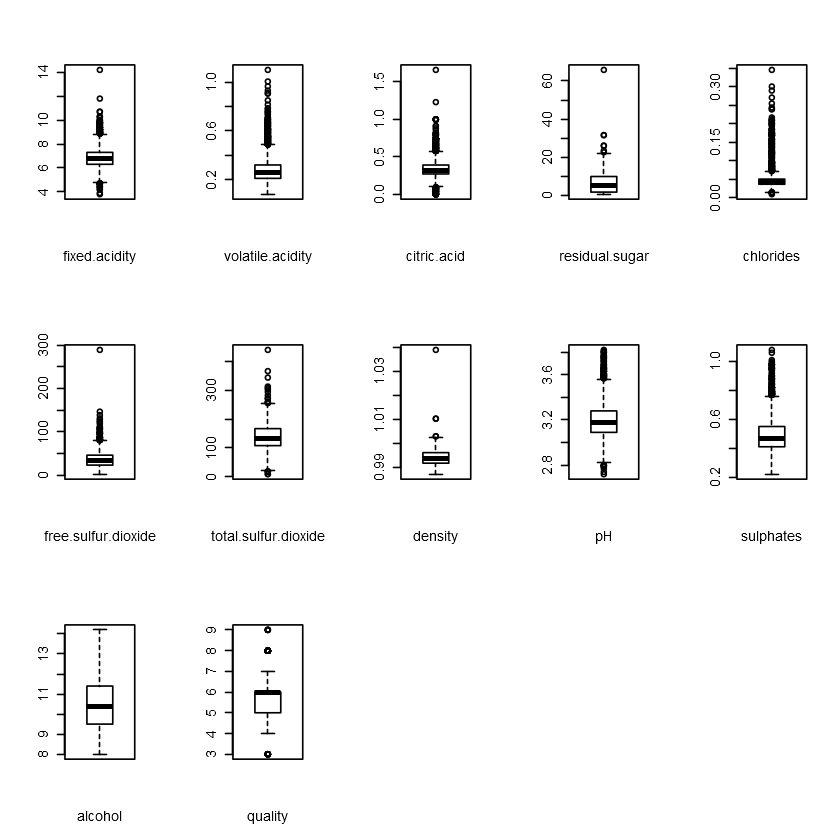

In [434]:
##Se realizan los boxplot de cada uno de los atributos

xlabels=c("fixed.acidity", "volatile.acidity", "citric.acid", "residual.sugar",
                         "chlorides", "free.sulfur.dioxide", "total.sulfur.dioxide", "density",
                         "pH", "sulphates", "alcohol", "quality")
par(mfrow = c(3,5))
for (i in 1:length(xlabels))   {
    boxplot(DatosVino[i], xlab = xlabels[i])
    }

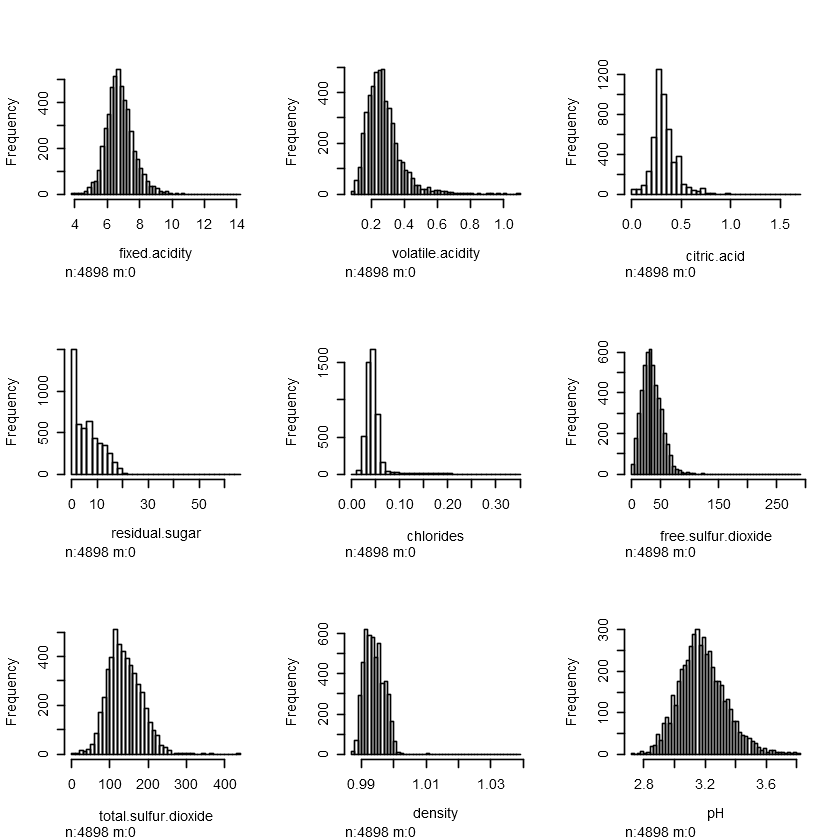

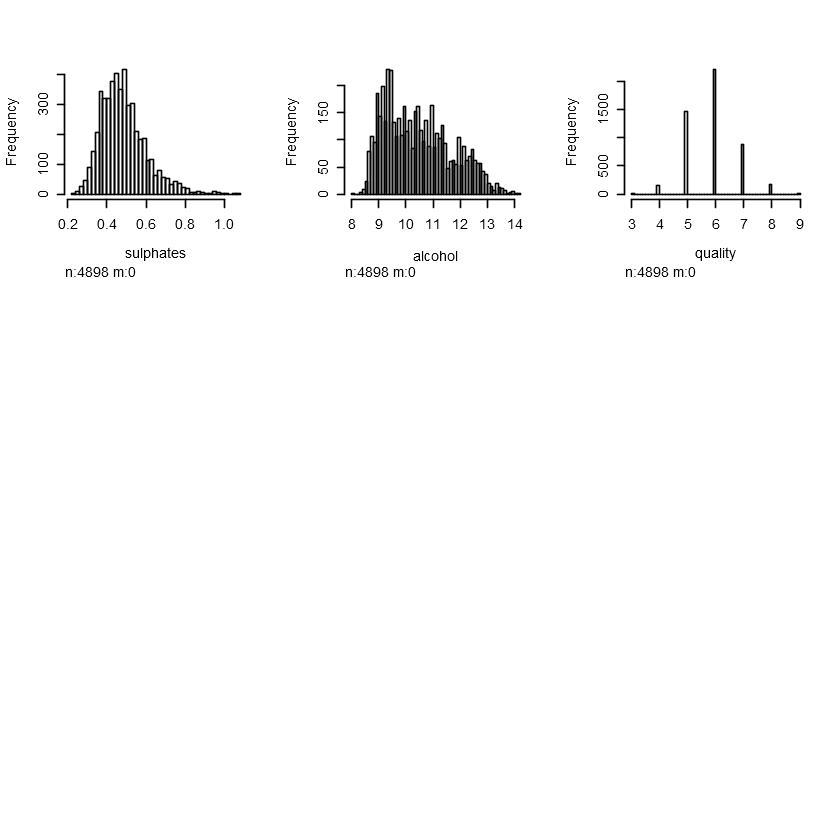

In [186]:
## Se realizan los histogramas de los atributos

## library(ggplot2)
par(mfrow = c(3,3))
hist.data.frame(Datos)

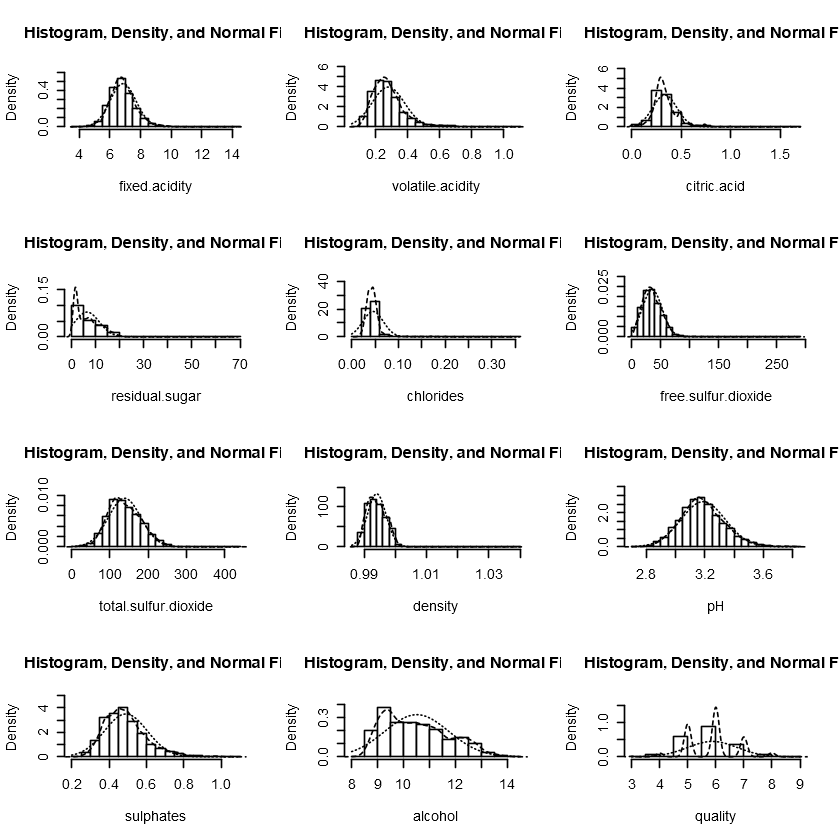

In [492]:
## Se realiza histograma de los datos, donde se incluyan las curvas de densidad
## y se pinta una normal sobre ellas

## library(plyr)
## library(psych)
## Muestra un histograma con curvas de densidad
multi.hist(Datos) #error, not numeric
multi.hist(Datos[,sapply(Datos, is.numeric)])

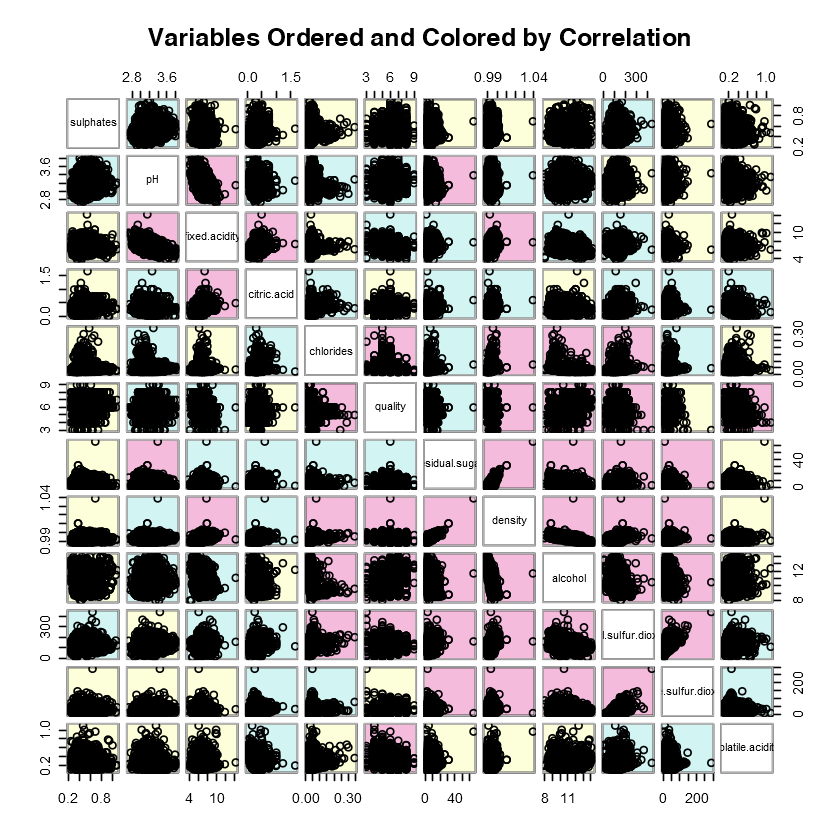

In [80]:
## Gráficos de correlación
# Scatterplot Matrices from the glus Package 
library(gclus)
Datos.r <- abs(cor(Datos)) # get correlations
Datos.col <- dmat.color(Datos.r) # get colors
# reorder variables so those with highest correlation
# are closest to the diagonal
Datos.o <- order.single(Datos.r) 
cpairs(Datos, Datos.o, panel.colors=Datos.col, gap= .5,
main="Variables Ordered and Colored by Correlation" )

# Preparación de los datos
Se realizan algunas transformaciones y se preparan los datos para la aplicación de modelos

#### Se selecciona la variable quality como objetivo, a su vez, las calidades entre 1 y 5 son consideradas
#### de baja calidad o "BadWine" y entre 6 y 10 como "GoodWine"

In [471]:
## Se clasifican los valores de la variable en BadWine (quality
## desde 1 hasta 5) y GoodWine (quality desde 6 hasta 10)

for (i in 1:length(Datos$quality)) {
    if (Datos$quality[i] <= 5) {
        Datos$quality[i] = "BadWine"
    }
    else {
        Datos$quality[i] = "GoodWine" 
    }
}

In [461]:
head(Datos$quality)

[1] "GoodWine" "GoodWine" "GoodWine" "GoodWine" "GoodWine" "GoodWine"

In [481]:
## Se extrae la variable objetivo de los datos
## La variable objetivo es quality

Datos2 <- Datos[1:11]

#Se almacenan los datos de la variable objetivo en Y
Y <- Datos[12]

In [482]:
## Se realiza una normalización de los datos

MinMaxScaler <- 
function(x) {
    return ((x - min(x)) / (max(x) - min(x)))
}

##
## se aplica la función a los datos
##
X_scaled <- as.data.frame(lapply(Datos2, MinMaxScaler))
head(X_scaled)


fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0.3076923,0.1862745,0.2168675,0.30828221,0.1068249,0.14982578,0.3735499,0.2677848,0.2545455,0.2674419,0.1290323
0.2403846,0.2156863,0.2048193,0.01533742,0.1186944,0.04181185,0.2853828,0.1328321,0.5272727,0.3139535,0.2419355
0.4134615,0.1960784,0.2409639,0.09662577,0.1216617,0.09756098,0.2041763,0.1540389,0.4909091,0.2558140,0.3387097
0.3269231,0.1470588,0.1927711,0.12116564,0.1454006,0.15679443,0.4106729,0.1636784,0.4272727,0.2093023,0.3064516
0.3269231,0.1470588,0.1927711,0.12116564,0.1454006,0.15679443,0.4106729,0.1636784,0.4272727,0.2093023,0.3064516
0.4134615,0.1960784,0.2409639,0.09662577,0.1216617,0.09756098,0.2041763,0.1540389,0.4909091,0.2558140,0.3387097


# Aplicación de modelos sobre los datos

# Aplicación de ténica C50

#### Verificación de hiperparámetros

In [341]:
modelLookup("C5.0")

model,parameter,label,forReg,forClass,probModel
C5.0,trials,# Boosting Iterations,FALSE,TRUE,TRUE
C5.0,model,Model Type,FALSE,TRUE,TRUE
C5.0,winnow,Winnow,FALSE,TRUE,TRUE


In [472]:
Datos$quality <- factor(Datos$quality, labels = c("BadWine", "GoodWine"))

In [493]:
## Se generan 15 folds para la aplicación de Cross Validation
folds <- createFolds(Datos$quality, k = 15)
str(folds)

List of 15
 $ Fold01: int [1:326] 8 38 51 62 65 73 76 89 99 119 ...
 $ Fold02: int [1:327] 25 31 108 111 117 164 165 182 202 228 ...
 $ Fold03: int [1:326] 11 34 53 56 64 82 102 106 120 137 ...
 $ Fold04: int [1:326] 9 10 27 32 33 35 60 68 69 96 ...
 $ Fold05: int [1:327] 23 37 39 41 71 80 101 159 166 179 ...
 $ Fold06: int [1:327] 19 45 81 103 107 118 196 221 241 260 ...
 $ Fold07: int [1:326] 12 52 55 75 87 145 189 200 233 272 ...
 $ Fold08: int [1:327] 6 18 44 47 50 59 93 104 113 140 ...
 $ Fold09: int [1:325] 2 7 17 24 26 63 90 92 110 123 ...
 $ Fold10: int [1:326] 15 22 42 54 70 84 105 126 127 129 ...
 $ Fold11: int [1:328] 1 14 58 67 83 100 156 190 193 204 ...
 $ Fold12: int [1:327] 3 5 13 16 20 43 49 57 61 72 ...
 $ Fold13: int [1:327] 28 29 36 48 88 91 95 109 136 139 ...
 $ Fold14: int [1:327] 4 30 46 66 77 97 128 130 131 135 ...
 $ Fold15: int [1:326] 21 40 85 86 94 112 115 144 148 153 ...


### Cross Validation
Se utiliza Cross Validation para realizar el entrenamiento y test del modelo

In [474]:
## Cross Validation

##lista <- c()

ff <- function(fold){
    
    ## Se elimina el grupo del patrón de entrenamiento
    X_Train <- Datos[-fold, ]
    Y_Train <- Datos$quality[-fold]
    
    ## Se usa el grupo como conjunto de prueba
    X_Test <- Datos[fold,]
    Y_Test_True <- Datos$quality[fold]
    
    ## Entrenamiento del modelo y pronostico
    clf <- C5.0(quality ~ ., data = X_Train)
    Y_Test_Pred <- predict(clf, X_Test)
    
    ## Se calcula una métrica de error
    kappa <- kappa2(data.frame(Y_Test_True, Y_Test_Pred))$value
    
##lista <<- c(lista, clf$quality)
    
    ## Se retorna el valor calculado
    return(kappa)
 }

## Se guardan los resultados para cada uno de los grupos creados
 
cv_results <- lapply(folds, ff)

## Se calcula kappa para cada uno de los grupos

str(cv_results)

List of 15
 $ Fold01: num 0.533
 $ Fold02: num 0.478
 $ Fold03: num 0.516
 $ Fold04: num 0.515
 $ Fold05: num 0.431
 $ Fold06: num 0.552
 $ Fold07: num 0.452
 $ Fold08: num 0.422
 $ Fold09: num 0.526
 $ Fold10: num 0.493
 $ Fold11: num 0.547
 $ Fold12: num 0.391
 $ Fold13: num 0.503
 $ Fold14: num 0.46
 $ Fold15: num 0.484


In [475]:
mean(unlist(cv_results))

[1] 0.4868796

In [476]:
##
## La función `train` permite construir muchos modelos
## que difieren en el conjunto de parámetros ajustables
## requeridos para su estimación. Se usan los valores
## por defecto que tiene `train`.
## Note que este paso requiere mucho tiempo de cómputo.
##
set.seed(300)
m <- train(quality ~ ., data = Datos, method = "C5.0")
m

C5.0 

4898 samples
  11 predictor
   2 classes: 'BadWine', 'GoodWine' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 4898, 4898, 4898, 4898, 4898, 4898, ... 
Resampling results across tuning parameters:

  model  winnow  trials  Accuracy   Kappa    
  rules  FALSE    1      0.7670166  0.4694546
  rules  FALSE   10      0.8082515  0.5747604
  rules  FALSE   20      0.8158895  0.5907815
  rules   TRUE    1      0.7670166  0.4694546
  rules   TRUE   10      0.8082515  0.5747604
  rules   TRUE   20      0.8158895  0.5907815
  tree   FALSE    1      0.7633212  0.4618936
  tree   FALSE   10      0.8143536  0.5711056
  tree   FALSE   20      0.8189693  0.5810467
  tree    TRUE    1      0.7633212  0.4618936
  tree    TRUE   10      0.8143536  0.5711056
  tree    TRUE   20      0.8189693  0.5810467

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were trials = 20, model = tree and winnow
 = TRUE.

# Aplicación de OneR

### Verificación de hiperparámetros

In [329]:
modelLookup("OneR")

model,parameter,label,forReg,forClass,probModel
OneR,parameter,none,FALSE,TRUE,TRUE


### Aplicación de Cross Validation

In [364]:
## Cross Validation

lista <- c()
f <- function(fold){
    
    ## Se elimina el grupo del patrón de entrenamiento
    X_Train <- Datos[-fold, ]
    Y_Train <- Datos$quality[-fold]
    
    ## Se usa el grupo como conjunto de prueba
    X_Test <- Datos[fold,]
    Y_Test_True <- Datos$quality[fold]
    
    ## Entrenamiento del modelo y pronostico
    clf <- OneR(quality ~ ., verbose  = TRUE, data = X_Train)
    Y_Test_Pred <- predict(clf, X_Test)
    
    ## Se calcula una métrica de error
    kappa <- kappa2(data.frame(Y_Test_True, Y_Test_Pred))$value
    
    lista <<- c(lista, clf$quality)
    
    ## Se retorna el valor calculado
    return(kappa)
 }

## Se guardan los resultados para cada uno de los grupos creados
 
cv_results <- lapply(folds, f)

## Se calcula kappa para cada uno de los grupos

str(cv_results)

Warning message in OneR.data.frame(x = data, ties.method = ties.method, verbose = verbose, :
"data contains unused factor levels"


    Attribute            Accuracy
1 * alcohol              67.73%  
2   chlorides            67.4%   
3   volatile.acidity     67.32%  
4   total.sulfur.dioxide 66.81%  
5   free.sulfur.dioxide  66.7%   
6   fixed.acidity        66.55%  
6   citric.acid          66.55%  
8   residual.sugar       66.53%  
8   density              66.53%  
8   pH                   66.53%  
8   sulphates            66.53%  
---
Chosen attribute due to accuracy
and ties method (if applicable): '*'



Warning message in OneR.data.frame(x = data, ties.method = ties.method, verbose = verbose, :
"data contains unused factor levels"


    Attribute            Accuracy
1 * alcohol              67.49%  
2   volatile.acidity     67.45%  
3   chlorides            67.43%  
4   total.sulfur.dioxide 67.03%  
5   free.sulfur.dioxide  66.64%  
6   fixed.acidity        66.57%  
7   citric.acid          66.53%  
8   residual.sugar       66.51%  
8   density              66.51%  
8   pH                   66.51%  
8   sulphates            66.51%  
---
Chosen attribute due to accuracy
and ties method (if applicable): '*'



Warning message in OneR.data.frame(x = data, ties.method = ties.method, verbose = verbose, :
"data contains unused factor levels"


    Attribute            Accuracy
1 * alcohol              67.78%  
2   volatile.acidity     67.48%  
3   chlorides            67.45%  
4   total.sulfur.dioxide 66.93%  
5   free.sulfur.dioxide  66.69%  
6   density              66.64%  
7   fixed.acidity        66.56%  
7   citric.acid          66.56%  
9   residual.sugar       66.54%  
10  pH                   66.51%  
10  sulphates            66.51%  
---
Chosen attribute due to accuracy
and ties method (if applicable): '*'



Warning message in OneR.data.frame(x = data, ties.method = ties.method, verbose = verbose, :
"data contains unused factor levels"


    Attribute            Accuracy
1 * alcohol              67.65%  
2   volatile.acidity     67.54%  
3   chlorides            67.34%  
4   total.sulfur.dioxide 66.82%  
5   free.sulfur.dioxide  66.69%  
6   citric.acid          66.6%   
7   fixed.acidity        66.54%  
8   residual.sugar       66.51%  
8   density              66.51%  
8   pH                   66.51%  
8   sulphates            66.51%  
---
Chosen attribute due to accuracy
and ties method (if applicable): '*'



Warning message in OneR.data.frame(x = data, ties.method = ties.method, verbose = verbose, :
"data contains unused factor levels"


    Attribute            Accuracy
1 * alcohol              67.93%  
2   volatile.acidity     67.49%  
3   chlorides            67.38%  
4   total.sulfur.dioxide 67.03%  
5   free.sulfur.dioxide  66.66%  
6   fixed.acidity        66.55%  
7   citric.acid          66.51%  
7   residual.sugar       66.51%  
7   density              66.51%  
7   pH                   66.51%  
7   sulphates            66.51%  
---
Chosen attribute due to accuracy
and ties method (if applicable): '*'



Warning message in OneR.data.frame(x = data, ties.method = ties.method, verbose = verbose, :
"data contains unused factor levels"


    Attribute            Accuracy
1 * alcohol              67.8%   
2   chlorides            67.39%  
3   volatile.acidity     67.37%  
4   total.sulfur.dioxide 66.95%  
5   free.sulfur.dioxide  66.69%  
6   citric.acid          66.64%  
7   fixed.acidity        66.56%  
8   residual.sugar       66.51%  
8   density              66.51%  
8   pH                   66.51%  
8   sulphates            66.51%  
---
Chosen attribute due to accuracy
and ties method (if applicable): '*'



Warning message in OneR.data.frame(x = data, ties.method = ties.method, verbose = verbose, :
"data contains unused factor levels"


    Attribute            Accuracy
1 * alcohol              67.63%  
2   volatile.acidity     67.54%  
3   chlorides            67.39%  
4   total.sulfur.dioxide 66.84%  
5   free.sulfur.dioxide  66.67%  
6   citric.acid          66.62%  
7   fixed.acidity        66.56%  
8   residual.sugar       66.51%  
8   density              66.51%  
8   pH                   66.51%  
8   sulphates            66.51%  
---
Chosen attribute due to accuracy
and ties method (if applicable): '*'



Warning message in OneR.data.frame(x = data, ties.method = ties.method, verbose = verbose, :
"data contains unused factor levels"


    Attribute            Accuracy
1 * alcohol              67.67%  
2   chlorides            67.5%   
3   volatile.acidity     67.45%  
4   free.sulfur.dioxide  66.69%  
4   total.sulfur.dioxide 66.69%  
6   citric.acid          66.62%  
7   fixed.acidity        66.58%  
8   residual.sugar       66.51%  
8   density              66.51%  
8   pH                   66.51%  
8   sulphates            66.51%  
---
Chosen attribute due to accuracy
and ties method (if applicable): '*'



Warning message in OneR.data.frame(x = data, ties.method = ties.method, verbose = verbose, :
"data contains unused factor levels"


    Attribute            Accuracy
1 * alcohol              67.53%  
2   citric.acid          67.43%  
2   chlorides            67.43%  
4   volatile.acidity     67.38%  
5   total.sulfur.dioxide 66.79%  
6   free.sulfur.dioxide  66.7%   
7   fixed.acidity        66.55%  
8   residual.sugar       66.53%  
8   density              66.53%  
8   pH                   66.53%  
8   sulphates            66.53%  
---
Chosen attribute due to accuracy
and ties method (if applicable): '*'



Warning message in OneR.data.frame(x = data, ties.method = ties.method, verbose = verbose, :
"data contains unused factor levels"


    Attribute            Accuracy
1 * alcohol              67.56%  
2   volatile.acidity     67.49%  
3   chlorides            67.45%  
4   total.sulfur.dioxide 67.14%  
5   free.sulfur.dioxide  66.7%   
6   fixed.acidity        66.57%  
7   citric.acid          66.55%  
8   residual.sugar       66.53%  
8   density              66.53%  
8   pH                   66.53%  
8   sulphates            66.53%  
---
Chosen attribute due to accuracy
and ties method (if applicable): '*'



Warning message in OneR.data.frame(x = data, ties.method = ties.method, verbose = verbose, :
"data contains unused factor levels"


    Attribute            Accuracy
1 * alcohol              67.78%  
2   volatile.acidity     67.43%  
3   chlorides            67.32%  
4   total.sulfur.dioxide 66.99%  
5   free.sulfur.dioxide  66.68%  
6   fixed.acidity        66.55%  
6   citric.acid          66.55%  
8   residual.sugar       66.51%  
8   density              66.51%  
8   pH                   66.51%  
8   sulphates            66.51%  
---
Chosen attribute due to accuracy
and ties method (if applicable): '*'



Warning message in OneR.data.frame(x = data, ties.method = ties.method, verbose = verbose, :
"data contains unused factor levels"


    Attribute            Accuracy
1 * alcohol              67.71%  
2   chlorides            67.58%  
3   volatile.acidity     67.51%  
4   total.sulfur.dioxide 67.05%  
5   free.sulfur.dioxide  66.68%  
6   fixed.acidity        66.57%  
6   citric.acid          66.57%  
8   residual.sugar       66.53%  
8   density              66.53%  
8   pH                   66.53%  
8   sulphates            66.53%  
---
Chosen attribute due to accuracy
and ties method (if applicable): '*'



Warning message in OneR.data.frame(x = data, ties.method = ties.method, verbose = verbose, :
"data contains unused factor levels"


    Attribute            Accuracy
1 * alcohol              67.56%  
2   volatile.acidity     67.48%  
3   chlorides            67.39%  
4   free.sulfur.dioxide  66.62%  
5   total.sulfur.dioxide 66.6%   
6   fixed.acidity        66.56%  
6   citric.acid          66.56%  
8   residual.sugar       66.51%  
8   density              66.51%  
8   pH                   66.51%  
8   sulphates            66.51%  
---
Chosen attribute due to accuracy
and ties method (if applicable): '*'



Warning message in OneR.data.frame(x = data, ties.method = ties.method, verbose = verbose, :
"data contains unused factor levels"


    Attribute            Accuracy
1 * alcohol              67.72%  
2   volatile.acidity     67.52%  
3   chlorides            67.45%  
4   total.sulfur.dioxide 66.91%  
5   free.sulfur.dioxide  66.69%  
6   citric.acid          66.6%   
7   fixed.acidity        66.56%  
8   residual.sugar       66.51%  
8   density              66.51%  
8   pH                   66.51%  
8   sulphates            66.51%  
---
Chosen attribute due to accuracy
and ties method (if applicable): '*'



Warning message in OneR.data.frame(x = data, ties.method = ties.method, verbose = verbose, :
"data contains unused factor levels"


    Attribute            Accuracy
1 * alcohol              67.67%  
2   chlorides            67.58%  
3   volatile.acidity     67.49%  
4   fixed.acidity        66.88%  
5   free.sulfur.dioxide  66.7%   
6   total.sulfur.dioxide 66.64%  
7   citric.acid          66.62%  
8   residual.sugar       66.53%  
8   density              66.53%  
8   pH                   66.53%  
8   sulphates            66.53%  
---
Chosen attribute due to accuracy
and ties method (if applicable): '*'

List of 15
 $ Fold01: num 0.175
 $ Fold02: num 0.228
 $ Fold03: num 0.135
 $ Fold04: num 0.191
 $ Fold05: num 0.0787
 $ Fold06: num 0.134
 $ Fold07: num 0.213
 $ Fold08: num 0.177
 $ Fold09: num 0.234
 $ Fold10: num 0.213
 $ Fold11: num 0.136
 $ Fold12: num 0.164
 $ Fold13: num 0.189
 $ Fold14: num 0.161
 $ Fold15: num 0.193


# Aplicación de Random Forest
En este método se combinan el bagging con la selección aleatoria de caracteríticas para aumetar la diversidad. La salida del modelo se obtiene por votación. Cada ejemplo que no es considerado durante el entrenamiento es usado como parte del conjunto de prueba.

### Verificación de hiperparámetros

In [ ]:
modelLookup("randomForest")

In [365]:
set.seed(300)
##
## por defecto crea un ensamble de 500 arboles
## que usan la raíz cuadrada de la cantidad
## de atributos presentes en el conjunto de entrenamiento
##
rf <- randomForest(quality ~., data = Datos)
rf



Call:
 randomForest(formula = quality ~ ., data = Datos) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 14.7%
Confusion matrix:
         BadWine GoodWine class.error
BadWine     1187      453  0.27621951
GoodWine     267     2991  0.08195212

# Aplicación de técnica KNN

### Verificación de hiperparámetros

In [500]:
modelLookup("knn")

model,parameter,label,forReg,forClass,probModel
knn,k,#Neighbors,TRUE,TRUE,TRUE


### Entrenamiento de modelo

In [483]:
## Entrenamiento del modelo
## Conjuntos de entrenamiento y prueba

Datos_Train    <- X_scaled[1:1000,]
Datos_Test     <- X_scaled[1001:4898,]
Y_Train_True   <- Y[1:1000,]
Y_Test_True    <- Y[1001:4898,]

In [486]:
Y_Test_Pred <- knn(train = Datos_Train,
                  test = Datos_Test,
                  cl = Y_Train_True,
                  k = 25)

### Evaluación de modelo

In [487]:
## Evaluación del modelo
## Matriz de confusión

table(Y_Test_True, Y_Test_Pred)

           Y_Test_Pred
Y_Test_True BadWine GoodWine
   BadWine      389      893
   GoodWine     212     2404

In [372]:
# fff <- function(fold){
    
    ## Se elimina el grupo del patrón de entrenamiento
#    X_TrainKNN <- Datos[-fold, ]
#    Y_TrainKNN <- Datos$quality[-fold]
    
    ## Se usa el grupo como conjunto de prueba
#    X_TestKNN <- Datos[fold,]
#    Y_Test_TrueKNN <- Datos$quality[fold]
#}
 
##cv_results <- lapply(folds, fff)


In [507]:
## A continuación se presentan resultados más completos sobre el KNN
CrossTable(x = Y_Test_True, 
           y = Y_Test_Pred,
           prop.chisq=FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  3898 

 
             | Y_Test_Pred 
 Y_Test_True |   BadWine |  GoodWine | Row Total | 
-------------|-----------|-----------|-----------|
     BadWine |       389 |       893 |      1282 | 
             |     0.303 |     0.697 |     0.329 | 
             |     0.647 |     0.271 |           | 
             |     0.100 |     0.229 |           | 
-------------|-----------|-----------|-----------|
    GoodWine |       212 |      2404 |      2616 | 
             |     0.081 |     0.919 |     0.671 | 
             |     0.353 |     0.729 |           | 
             |     0.054 |     0.617 |           | 
-------------|-----------|-----------|-----------|
Column Total |       601 |      3297 |      3898 | 
             |     0.154 |     0.846 |           | 
-------------|---

# Conclusiones y análisis general

-**Se aplicaron 4 modelos: OneR, C5.0, Random Forest y KNN. Se realizó búsqueda de modelos y análisis de otros analistas, en sitios como Kaggle. Se encontró, que en general, los niveles de la métrica accuracy se encontraban entre 60% y 70%.** 

-**En el presente análisis se utilizó Cross Validation para la separación de los datos, donde se encontró, que hubo una mejora respecto a los resultados realizando particiones deterministicas**

-**Si se observan las métricas de error, se tiene que el KNN reporta niveles altos de error, lo cual no sería acertado para los objetivos del negocio.**

-**La utilización del Random Forest, con 500 árboles, da un error del 14%,7; que sumado a los valores mostrados en la matriz de confusión, lo podrían convertir en un buen modelo.**

-** Por su parte, OneR y C5.0 presentan valores similares a los encontrados en fuentes externas, realizadas por otros analistas. Convirtiendolos en modelos acertados.**

-** Desde el punto de vista del error, si bien OneR y C5.0 son buenos modelos, presentan valores Kappa elevados, rondando los 0,4 y 0,5.**

-** Se concluye, que de los 4 modelos utilizados, OneR y C5.0 serían acertados para aplicar en productivo. Así mismo el Random Forest, sin embargo, su utilización consumió mucho recurso de máquina a la hora de ejecución.**

-** Una explicación a algunos resultados encontrados, es que los niveles de calidad 5 y 6 se encuentran a una distancia muy cercana, dificultando su clasificación.**